***a. Fit a multiple regression model to predict Sales using price, urban and US***

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Carseats.csv')

# transform categorical values using LabelEncoder()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Urban'] = le.fit_transform(data['Urban'])
data['US'] = le.fit_transform(data['US'])


In [13]:
x = data[['Price', 'Urban', 'US']] # independent variables
y = data['Sales'] # dependent variable

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x,y)
value_check = reg.predict([[83,1,1]])
print(value_check)

[9.702041]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***b. Provide an interpretation about each coefficient in the model.***

In [14]:
coefficient = reg.coef_
print(coefficient)

[-0.05445885 -0.02191615  1.2005727 ]


***c. Write the model in the equation form.***

In [15]:
print(f"{reg.intercept_} + ({coefficient[0]} * Price) + ({coefficient[1]} * Urban) + ({coefficient[2]} * US)")

13.043468936764896 + (-0.0544588491775822 * Price) + (-0.021916150814141 * Urban) + (1.200572697794116 * US)


**d. For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?**

In [16]:
import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        17:08:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

**e. On the basis of your response to the previous question, ft a smaller model that only uses the predictors for which there is evidence of association with the outcome.**

In [17]:
x_smaller = data[['Price', 'US']]

reg_smaller = LinearRegression()
reg_smaller.fit(x_smaller, y)

coeff_smaller = reg_smaller.coef_
print(f"{reg_smaller.intercept_} + ({coeff_smaller[0]} * Price) + ({coeff_smaller[1]} * US)")


13.030792754615764 + (-0.05447763247978729 * Price) + (1.1996429432266782 * US)


**f. How well do the models in (a) and (e) ft the data?**


In [18]:
print(f"Model (a) R-squared: {reg.score(x[['Price', 'Urban', 'US']], y)}")
print(f"Model (e) R-squared: {reg_smaller.score(x_smaller, y)}")

Model (a) R-squared: 0.23927539218405547
Model (e) R-squared: 0.23926288842678567


**g. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).**

In [19]:
x_smaller = sm.add_constant(x_smaller)
model_smaller = sm.OLS(y, x_smaller).fit()
print(model_smaller.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.66e-24
Time:                        17:08:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

**h. Is there evidence of outliers or high leverage observations in the model from (e)?**

Potential high leverage observations: [42, 125, 155, 156, 159, 165, 171, 174, 191, 203, 208, 269, 272, 313, 315, 356, 365, 367, 383, 386]
Potential outliers: [25, 28, 30, 49, 50, 57, 68, 106, 143, 165, 174, 209, 258, 272, 298, 310, 316, 367, 376]


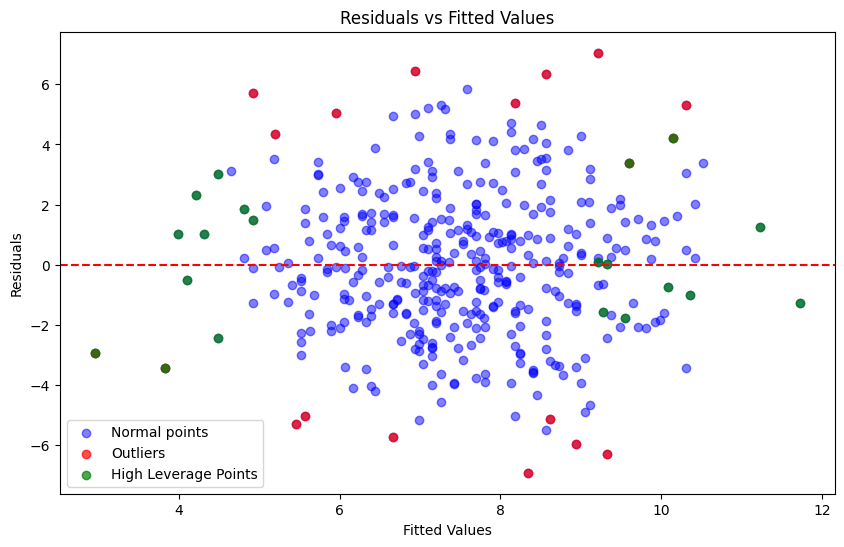

In [20]:
influence = model_smaller.get_influence()
leverage = influence.hat_matrix_diag
residuals = model_smaller.resid
fitted_vals = model_smaller.fittedvalues
cooks_distance = influence.cooks_distance[0]

high_leverage_indices = [i for i, val in enumerate(leverage) if val > 2 * (x_smaller.shape[1] / x_smaller.shape[0])]
outlier_indices = [i for i, val in enumerate(cooks_distance) if val > 4 / len(x_smaller)]

print("Potential high leverage observations:", high_leverage_indices)
print("Potential outliers:", outlier_indices)

import matplotlib.pyplot as plt

outliers = set(outlier_indices)
high_leverage = set(high_leverage_indices)

outlier_mask = [i in outliers for i in range(len(residuals))]
leverage_mask = [i in high_leverage for i in range(len(residuals))]

plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals, color='blue', label='Normal points', alpha=0.5)
plt.scatter(fitted_vals[outlier_mask], residuals[outlier_mask], color='red', label='Outliers', alpha=0.7)
plt.scatter(fitted_vals[leverage_mask], residuals[leverage_mask], color='green', label='High Leverage Points', alpha=0.7)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.show()